In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

df = pd.read_csv('data/E Commerce Dataset model2.csv')

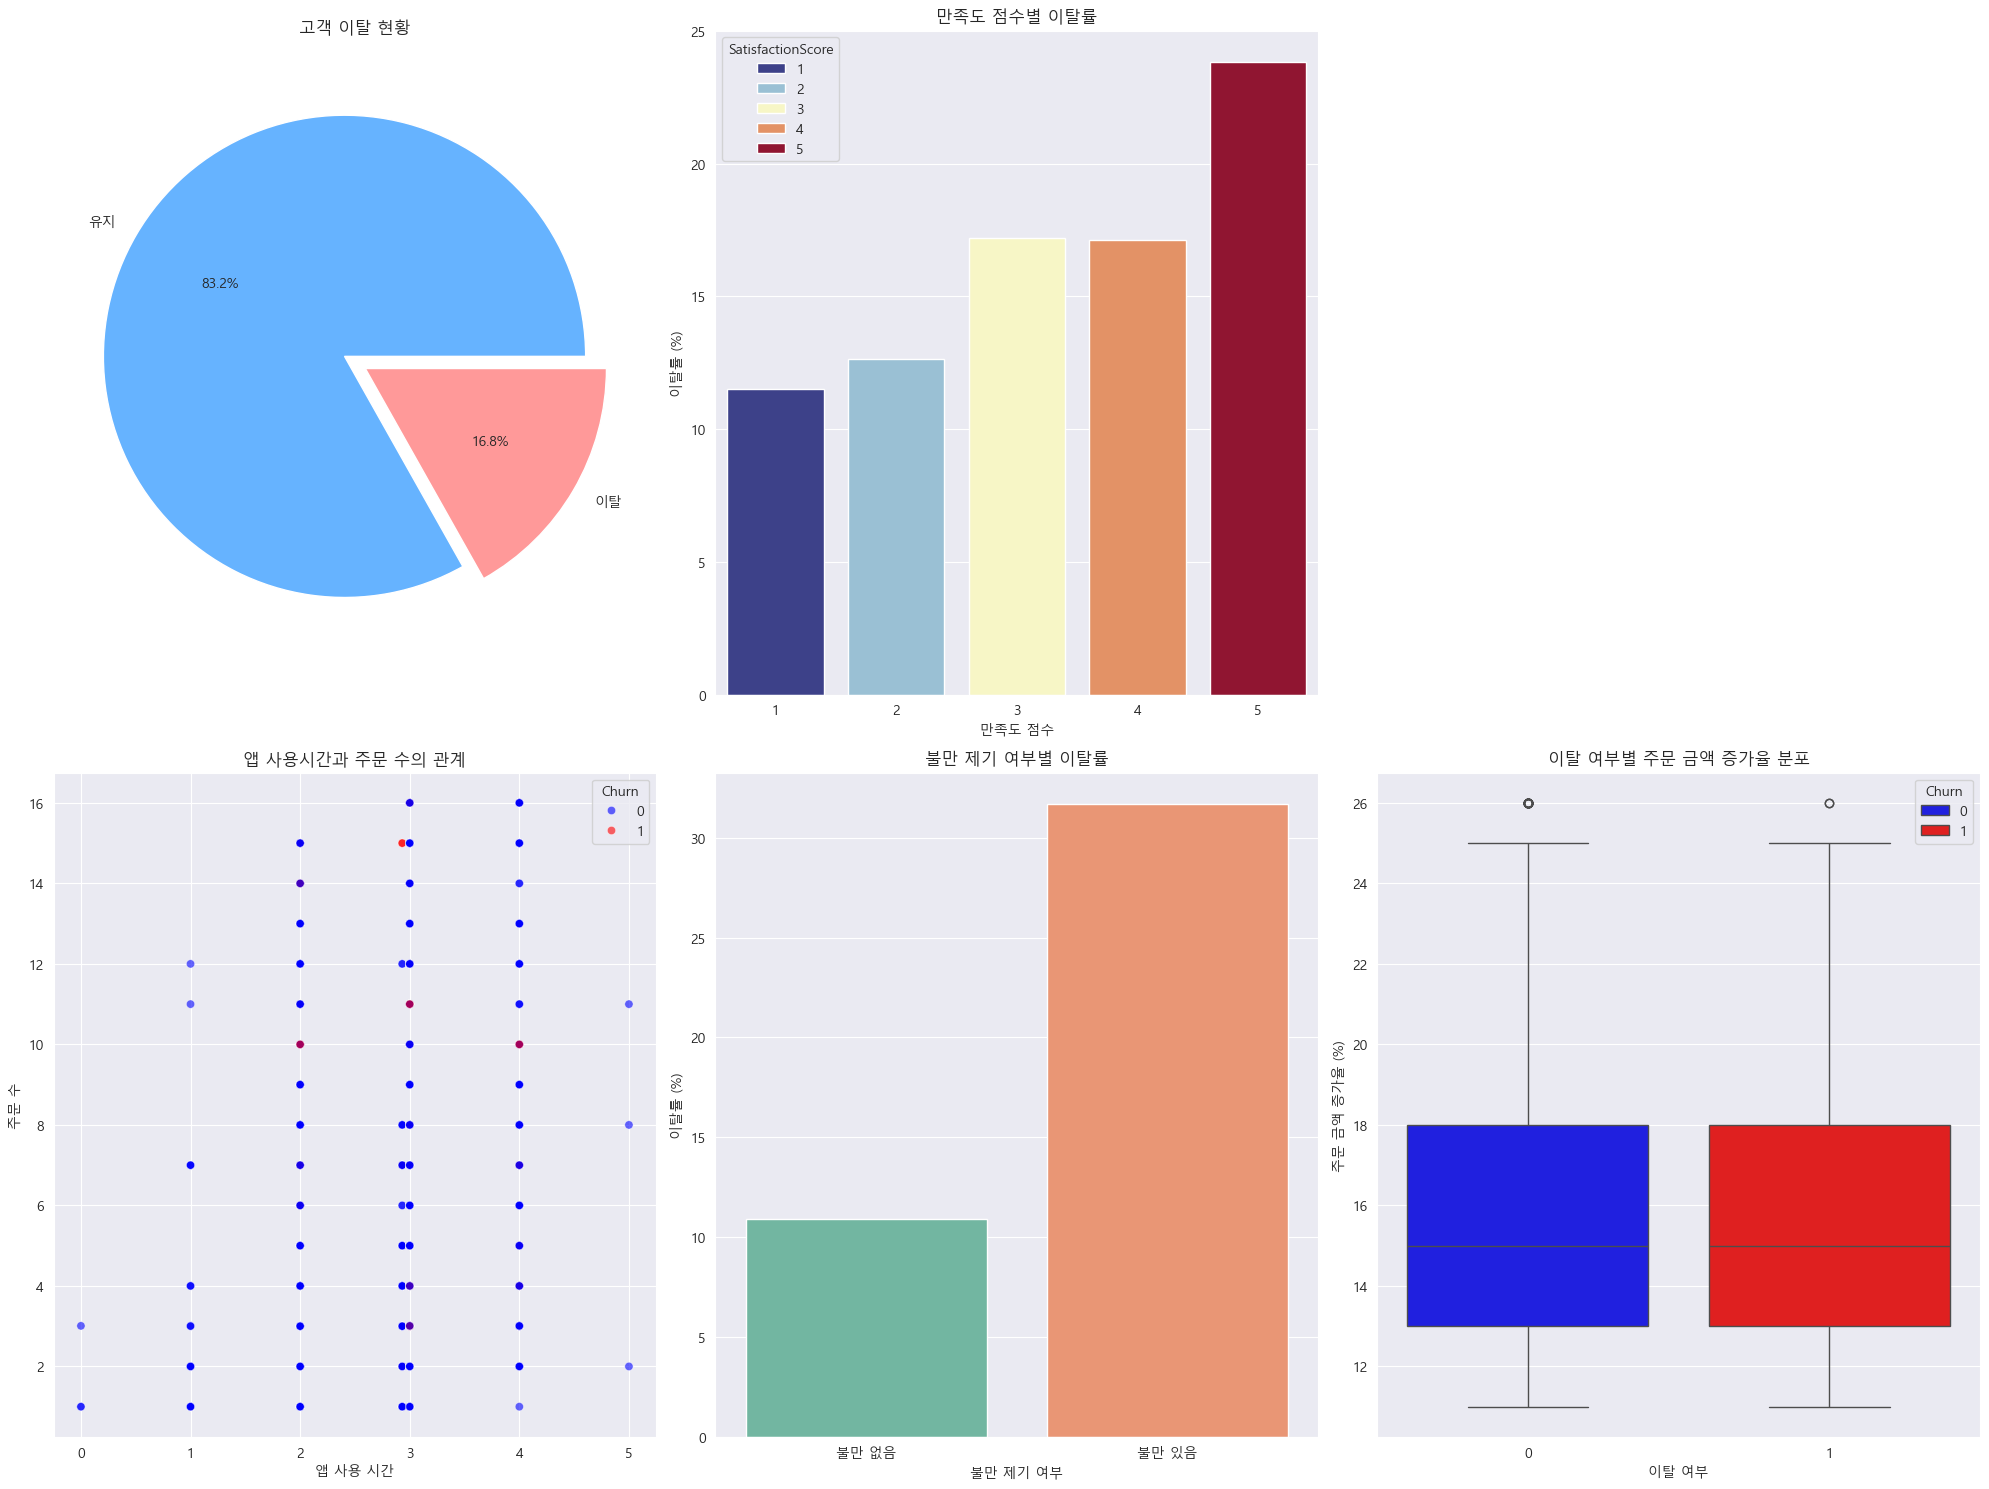

<Figure size 1500x500 with 0 Axes>

In [14]:
# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 1. 종합 분석 대시보드 생성
plt.figure(figsize=(20, 15))

# 1-1. 고객 이탈 분포 (파이차트)
plt.subplot(2, 3, 1)
colors = ['#66b3ff', '#ff9999']
plt.pie(df['Churn'].value_counts(),
        labels=['유지', '이탈'],
        autopct='%1.1f%%',
        colors=colors,
        explode=(0.05, 0.05))
plt.title('고객 이탈 현황', pad=20)

# 1-2. 만족도 점수별 이탈률 (막대 그래프)
plt.subplot(2, 3, 2)
churn_by_satisfaction = df.groupby('SatisfactionScore')['Churn'].mean() * 100
sns.barplot(x=churn_by_satisfaction.index,
            y=churn_by_satisfaction.values,
            hue=churn_by_satisfaction.index,
            palette='RdYlBu_r')
plt.title('만족도 점수별 이탈률')
plt.xlabel('만족도 점수')
plt.ylabel('이탈률 (%)')

# # 1-3. 도시 등급별 이탈률 (막대 그래프)
# plt.subplot(2, 3, 3)
# churn_by_city = df.groupby('CityTier')['Churn'].mean() * 100
# sns.barplot(x=churn_by_city.index,
#             y=churn_by_city.values,
#             hue=churn_by_city.index,
#             palette='viridis')
# plt.title('도시 등급별 이탈률')
# plt.xlabel('도시 등급')
# plt.ylabel('이탈률 (%)')

# 1-4. 앱 사용시간과 주문 수의 관계 (산점도)
plt.subplot(2, 3, 4)
sns.scatterplot(data=df,
                x='HourSpendOnApp',
                y='OrderCount',
                hue='Churn',
                palette=['blue', 'red'],
                alpha=0.6)
plt.title('앱 사용시간과 주문 수의 관계')
plt.xlabel('앱 사용 시간')
plt.ylabel('주문 수')

# 1-5. 불만 제기 여부와 이탈률 (막대 그래프)
plt.subplot(2, 3, 5)
complaints = ['불만 없음', '불만 있음']
churn_by_complain = df.groupby('Complain')['Churn'].mean() * 100
sns.barplot(x=complaints,
            y=churn_by_complain.values,
            hue=complaints,
            palette='Set2')
plt.title('불만 제기 여부별 이탈률')
plt.xlabel('불만 제기 여부')
plt.ylabel('이탈률 (%)')

# 1-6. 주문 금액 증가율과 이탈률 관계 (박스플롯)
plt.subplot(2, 3, 6)
sns.boxplot(data=df,
            x='Churn',
            y='OrderAmountHikeFromlastYear',
            hue='Churn',
            palette=['blue', 'red'])
plt.title('이탈 여부별 주문 금액 증가율 분포')
plt.xlabel('이탈 여부')
plt.ylabel('주문 금액 증가율 (%)')

plt.tight_layout()
plt.show()

# 2. 추가 상세 분석
plt.figure(figsize=(15, 5))

# # 2-1. 선호 결제 방식별 고객 분포
# # plt.subplot(1, 3, 1)
# # payment_cols = [col for col in df.columns if col.startswith('PreferredPaymentMode_')]
# # payment_data = df[payment_cols].sum()
# # plt.pie(payment_data,
# #         labels=[col.replace('PreferredPaymentMode_', '') for col in payment_cols],
# #         autopct='%1.1f%%')
# plt.title('선호 결제 방식 분포')

# # 2-2. 선호 주문 카테고리별 고객 분포
# plt.subplot(1, 3, 2)
# category_cols = [col for col in df.columns if col.startswith('PreferedOrderCat_')]
# category_data = df[category_cols].sum()
# plt.pie(category_data,
#         labels=[col.replace('PreferedOrderCat_', '') for col in category_cols],
#         autopct='%1.1f%%')
# plt.title('선호 주문 카테고리 분포')

# # 2-3. 등록된 기기 수별 이탈률
# plt.subplot(1, 3, 3)
# churn_by_devices = df.groupby('NumberOfDeviceRegistered')['Churn'].mean() * 100
# sns.barplot(x=churn_by_devices.index,
#             y=churn_by_devices.values,
#             hue=churn_by_devices.index,
#             palette='mako')
# plt.title('등록된 기기 수별 이탈률')
# plt.xlabel('등록된 기기 수')
# plt.ylabel('이탈률 (%)')

plt.tight_layout()
plt.show()

## 가설 1: 만족도가 낮을 수록 고객은 이탈할 가능성이 높다.

In [15]:
df.groupby('Churn')['SatisfactionScore'].mean()

Churn
0    3.001282
1    3.390295
Name: SatisfactionScore, dtype: float64

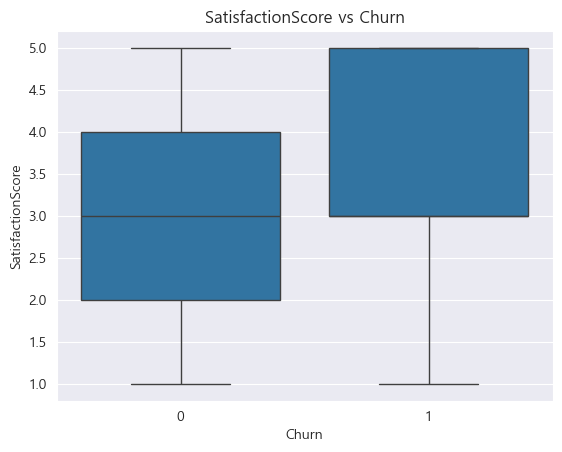

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Churn', y='SatisfactionScore', data=df)
plt.title('SatisfactionScore vs Churn')
plt.show()

In [17]:
from scipy.stats import ttest_ind

group0 = df[df['Churn'] == 0]['SatisfactionScore']  # 잔존 고객
group1 = df[df['Churn'] == 1]['SatisfactionScore']  # 이탈 고객

t_stat, p_value = ttest_ind(group0, group1, equal_var=False)

print(f"t-statistic = {t_stat:.3f}, p-value = {p_value:.4f}")

t-statistic = -8.101, p-value = 0.0000


## 가설 2: 불만을 제기한 고객은 이탈할 가능성이 높다.

In [18]:
pd.crosstab(df['Complain'], df['Churn'], margins=True, normalize='index')

Churn,0,1
Complain,,
0,0.890710,0.109290
1,0.683292,0.316708
All,0.831616,0.168384


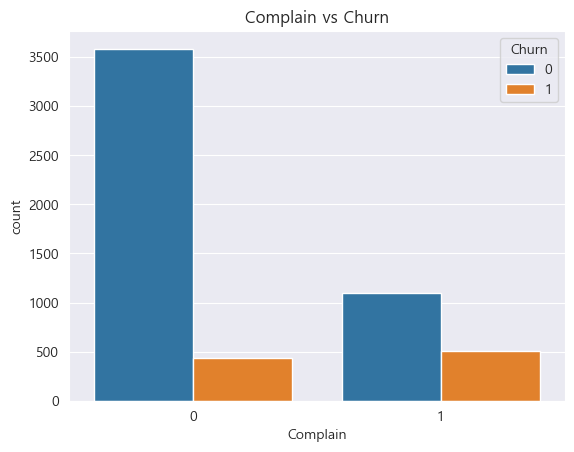

In [19]:
sns.countplot(x='Complain', hue='Churn', data=df)
plt.title('Complain vs Churn')
plt.show()

In [46]:
from scipy.stats import chi2_contingency

table = pd.crosstab(df['Complain'], df['Churn'])  # 원본 교차표
chi2, p, dof, expected = chi2_contingency(table)

print(f"Chi2 = {chi2:.3f}, p-value = {p:.100f}")

Chi2 = 350.925, p-value = 0.0000000000000000000000000000000000000000000000000000000000000000000000000000026644609654641377169015


## 가설 3: DaySinceLastOrder가 클수록 이탈할 가능성이 높다.

In [21]:
df.groupby('Churn')['DaySinceLastOrder'].mean()

Churn
0    4.793145
1    3.310494
Name: DaySinceLastOrder, dtype: float64

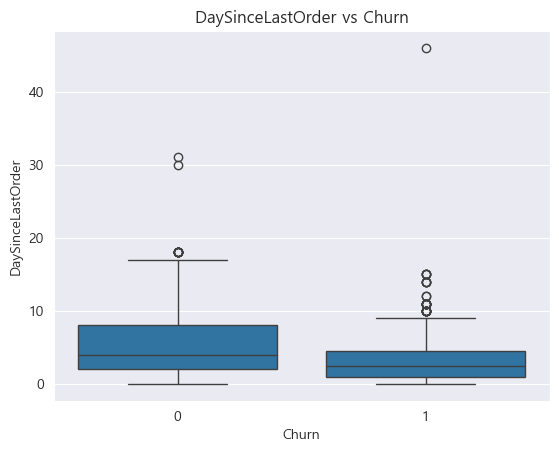

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Churn', y='DaySinceLastOrder', data=df)
plt.title('DaySinceLastOrder vs Churn')
plt.show()

In [42]:
plt.show()
from scipy.stats import ttest_ind

group0 = df[df['Churn'] == 0]['DaySinceLastOrder']
group1 = df[df['Churn'] == 1]['DaySinceLastOrder']

t_stat, p_value = ttest_ind(group0, group1, equal_var=False)
print(f"t-statistic = {t_stat:.3f}, p-value = {p_value:.40f}")

t-statistic = 12.363, p-value = 0.0000000000000000000000000000000020537156


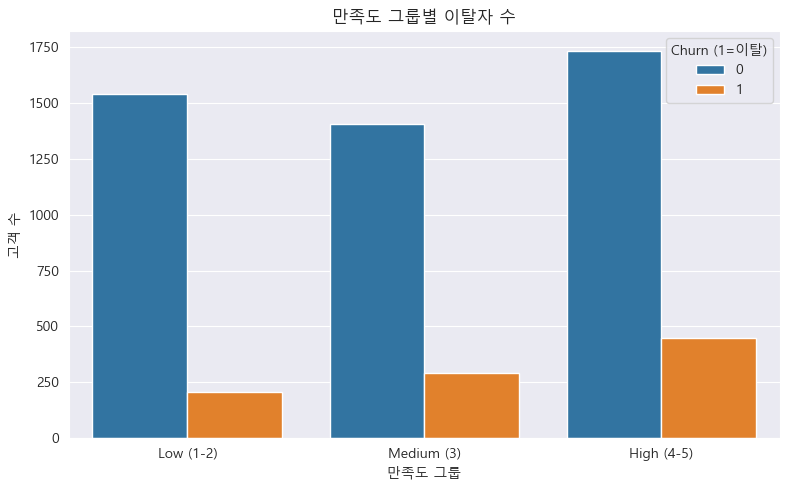

In [24]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 나눔고딕 또는 기본 한글 폰트 경로 지정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows인 경우
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지



# 만족도 그룹 만들기
def satisfaction_group(score):
    if score <= 2:
        return 'Low (1-2)'
    elif score == 3:
        return 'Medium (3)'
    else:
        return 'High (4-5)'

df['SatisfactionGroup'] = df['SatisfactionScore'].apply(satisfaction_group)

# 시각화
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='SatisfactionGroup', hue='Churn')
plt.title('만족도 그룹별 이탈자 수')
plt.xlabel('만족도 그룹')
plt.ylabel('고객 수')
plt.legend(title='Churn (1=이탈)')
plt.tight_layout()
plt.show()

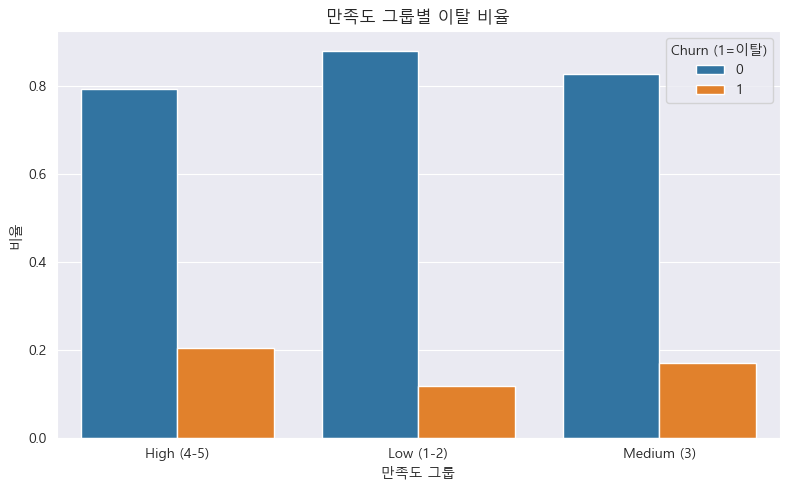

In [25]:
# 그룹별 고객 수 계산
grouped = df.groupby(['SatisfactionGroup', 'Churn']).size().reset_index(name='count')
total_by_group = grouped.groupby('SatisfactionGroup')['count'].transform('sum')
grouped['ratio'] = grouped['count'] / total_by_group

# 비율 막대그래프
plt.figure(figsize=(8, 5))
sns.barplot(data=grouped, x='SatisfactionGroup', y='ratio', hue='Churn')
plt.title('만족도 그룹별 이탈 비율')
plt.xlabel('만족도 그룹')
plt.ylabel('비율')
plt.legend(title='Churn (1=이탈)')
plt.tight_layout()
plt.show()

In [26]:
# 피벗 테이블 (count 기반)
pivot_table = pd.pivot_table(
    df,
    index='SatisfactionGroup',
    columns='Churn',
    values='Gender',  # 아무 변수로 count 계산
    aggfunc='count',
    fill_value=0,
    margins=True,
    margins_name='총합'
)

print(pivot_table)

KeyError: 'Gender'

In [37]:
# 실제로 세 그룹간의 이탈률이 다른지 검정
from scipy.stats import chi2_contingency

# 교차표 만들기
contingency = pd.crosstab(df['SatisfactionGroup'], df['Churn'])

# 카이제곱 검정
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi2 통계량: {chi2:.3f}")
print(f"p-value: {p:.20f}")
print(f"자유도: {dof}")

Chi2 통계량: 52.064
p-value: 0.00000000000494709509
자유도: 2
